### [Problem 1] Understanding the content of the competition

- **1. What kind of company is Home Credit?**

    Home Credit is a non-banking financial institution (NBFI). It was founded in 1997 in the Czech Republic. As an NBFI, Home Credit operates in the financial sector but does not have a full banking license. Instead of traditional banking services like accepting deposits, NBFI's focus on providing financial services such as lending and other credit-related activities.

- **2. What is expected in this competition?**
   
  1. Objective: The goal is to create better models for Home Credit to predict if clients can repay loans.

  2. Data Exploration: Participants need to understand and analyze the provided data to find useful patterns.

  3. Model Building: Create machine learning models based on the data to predict clients' repayment abilities.

  4. Evaluation: Models will be assessed based on certain criteria to find the most accurate ones.

  5. Innovation: Home Credit wants creative and improved solutions beyond their current methods.

  6. Practical Implementation: Consider how the models can be used in real-world situations at Home Credit to make lending decisions better.

- **3. What are the benefits companies can gain by predicting this?**
   
   1. Risk Management: Accurate predictions help in assessing the risk associated with each loan application. Financial institutions can identify clients who are likely to repay their loans on time, reducing the risk of defaults.

   2. Financial Inclusion: By using alternative data and advanced analytics, companies can extend credit to individuals with little or no credit history. This promotes financial inclusion by providing access to loans for a broader population.

   3. Improved Decision Making: Predictive models enable companies to make more informed lending decisions. This leads to a more efficient allocation of resources, ensuring that loans are provided to clients who have the ability to repay.

   4. Reduced Fraud: Advanced analytics can help in detecting unusual patterns or behaviors that may indicate fraudulent activities. This enhances the security of the lending process.

   5. Enhanced Customer Experience: By accurately assessing repayment abilities, companies can offer clients loan terms that are more suitable to their financial situation. This contributes to a positive borrowing experience and customer satisfaction.


### [Problem 2] Understanding the overview of data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
application = pd.read_csv("application_train.csv")

In [3]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31081 entries, 0 to 31080
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(85), int64(21), object(16)
memory usage: 28.9+ MB


mostly made up of floats with few integers and strings.

In [5]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,31081.000000,31081.000000,31081.000000,3.108100e+04,3.108100e+04,31081.000000,3.105500e+04,31081.000000,31081.000000,31081.000000,...,31080.000000,31080.000000,31080.000000,31080.000000,26880.000000,26880.000000,26880.000000,26880.000000,26880.000000,26880.000000
mean,118092.231524,0.080274,0.415881,1.720948e+05,6.001104e+05,27150.678115,5.394902e+05,0.020760,-16031.038834,63908.694958,...,0.008526,0.000740,0.000579,0.000386,0.007143,0.007887,0.033110,0.270275,0.261384,1.888616
std,10423.676420,0.271721,0.722285,6.700652e+05,4.030235e+05,14675.416544,3.704613e+05,0.013759,4356.541840,141375.632922,...,0.091945,0.027194,0.024059,0.019646,0.088522,0.116423,0.197508,0.929676,0.609019,1.868162
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000533,-25182.000000,-16365.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,109063.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16452.000000,2.385000e+05,0.010006,-19669.000000,-2781.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,118135.000000,0.000000,0.000000,1.467000e+05,5.172660e+05,24939.000000,4.500000e+05,0.018850,-15755.000000,-1223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,127119.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34681.500000,6.795000e+05,0.028663,-12374.000000,-286.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,136075.000000,1.000000,9.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7680.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,6.000000,6.000000,24.000000,8.000000,25.000000


Check for missing values

In [6]:
total = application.isnull().sum().sort_values(ascending = False)
percent = (total/application.isnull().count()*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent],axis=1,keys = ['Total', 'Percent'])
missing_data.head ()

,Total,Percent
COMMONAREA_MODE,21801,70.142531
COMMONAREA_AVG,21801,70.142531
COMMONAREA_MEDI,21801,70.142531
NONLIVINGAPARTMENTS_MODE,21629,69.589138
NONLIVINGAPARTMENTS_AVG,21629,69.589138


Draw a graph showing the percentage of classes

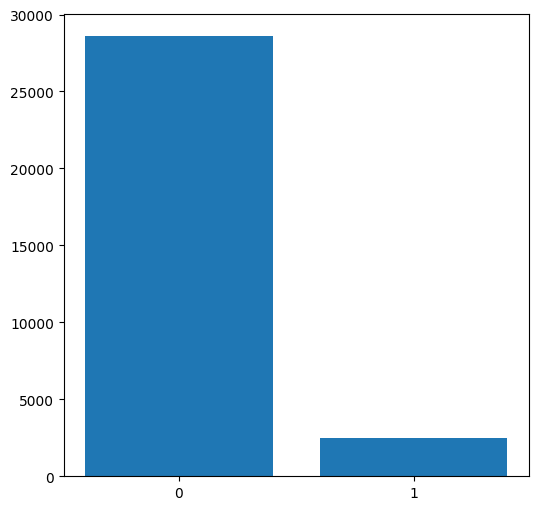

In [7]:
temp = application["TARGET"].value_counts()
y_pos = np.arange(len( temp.values))
plt.figure(figsize = (6,6))
plt.bar(y_pos, temp.values)
plt.xticks(y_pos, temp.index)
plt.show()

### [Problem 3] Defining issues

1. What is the gender ratio of loan applications and that of successful repayment ?

2. What are ages of clients and how does it relate to repayment on time?

3. Which type of loan did the client take ?

4. What is the education level of the client ?

5. Does the client own a car?

### Problem 4

In [12]:
gender = application['CODE_GENDER'].value_counts()
df = pd.DataFrame({'gender' : ['Female', 'Male', "N/A"],'values': gender.values})

plt.title('Gender ratio of loan applications')
sns.barplot(x = 'gender', y = "values", data = df)
plt.show()

ValueError: ignored

In [9]:
male = application.loc[:, 'CODE_GENDER'][application.loc[:, 'CODE_GENDER'] == 'M' ]
female = application.loc[:, 'CODE_GENDER'][application.loc[:, 'CODE_GENDER'] == 'F']

In [13]:
male_unpaid = application.loc[((application[ 'TARGET'] == 1) & (application['CODE_GENDER'] == 'M'))]
female_unpaid = application.loc[((application['TARGET'] ==1) & (application['CODE_GENDER' ]== 'F'))]

In [14]:
male_paid = len(male) - len(male_unpaid)
female_paid = len(female) - len(female_unpaid)

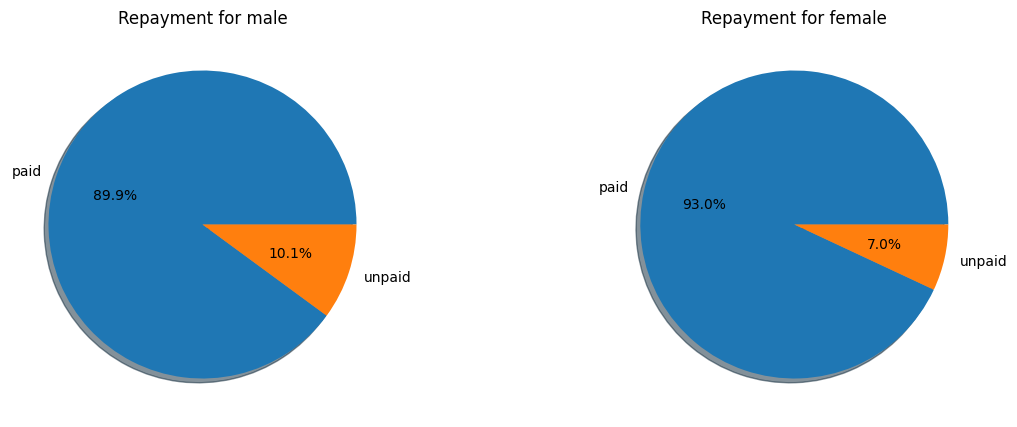

In [15]:
labels = 'paid', 'unpaid'
samplesM = [male_paid, len(male_unpaid)]
samplesF = [female_paid, len(female_unpaid)]

fig, axes = plt.subplots (1, 2)
axes[0].pie(samplesM, labels = labels, autopct = '%1.1f%%', shadow = True)
axes[0].set_title('Repayment for male')

axes[1].pie(samplesF, labels = labels, autopct = '%1.1f%%' , shadow = True)
axes[1].set_title('Repayment for female')

fig.set_size_inches(14, 5)

plt.show()

The number of female clients is almost twice than of male clients. Yet females are more likely to payback their loans(93%) compared to male (89.9%).

2. What are ages of clients and how does it relate to repayment on time?

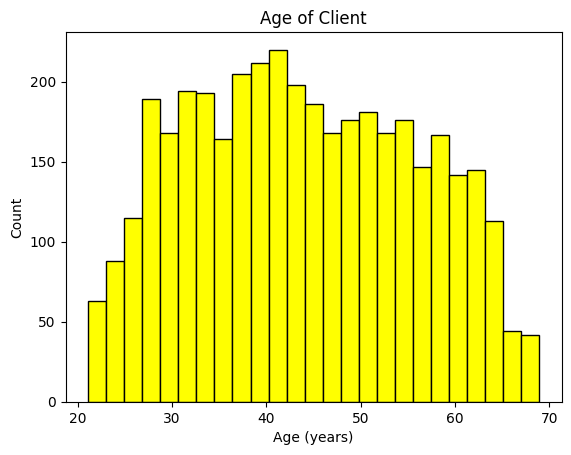

In [15]:
plt.hist(application['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25, color = 'yellow')
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

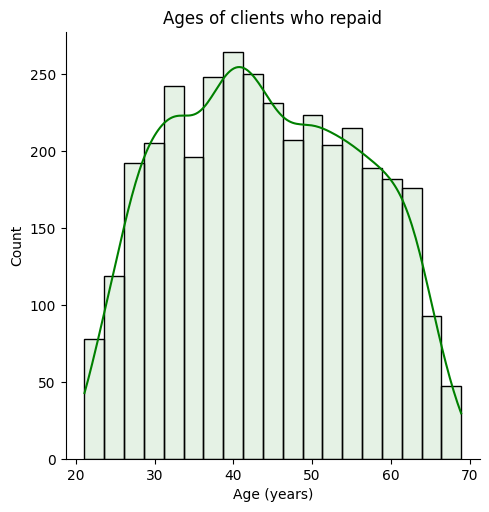

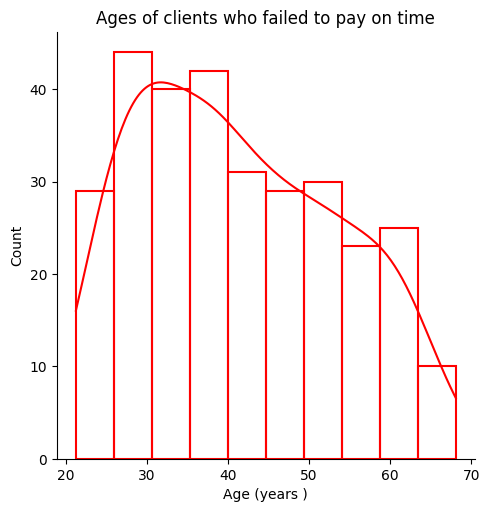

In [21]:
age_paid = application.loc [application['TARGET'] == 0, 'DAYS_BIRTH'] / -365
age_unpaid = application.loc [application['TARGET'] == 1, 'DAYS_BIRTH'] / -365

sns.displot (age_paid , color = 'green' , alpha= 0.1, kde = True)
plt.xlabel('Age (years)')
plt.title('Ages of clients who repaid')

sns.displot(age_unpaid, kde = True, color='red', fill = False)
plt.xlabel ('Age (years )')
plt.title ('Ages of clients who failed to pay on time')

plt.show()

The age range of clients is between 20 to 70 with 30 to 45 having the highest numbers . With regards to repayment , younger clients especially those between 25 and 40 have a higher chance of nor returning the loan whereas the older the client is the more likely he is to repay the loan.

Creating barplot and stats functions to display a barplot for different features and determine the percentages with respect to Target 1, in other words when a client was not able to repay on time

In [25]:
def barplot(feature, name, title):
  f = application[feature].value_counts()
  df = pd.DataFrame({name: f.index, 'values': f.values})

  plt.title(title)

  sns.barplot (x = name, y = "values", data =df)
  fig = plt.gcf()
  fig.set_size_inches (12, 5)

  plt.show()

In [26]:
def stats(feature ):
  percentage = application[[feature, 'TARGET']]. groupby([feature ], as_index = False).mean().round(3)
  percentage.sort_values (by = 'TARGET' , ascending = False, inplace = True )
  return percentage

4. What is the education level of the client ?

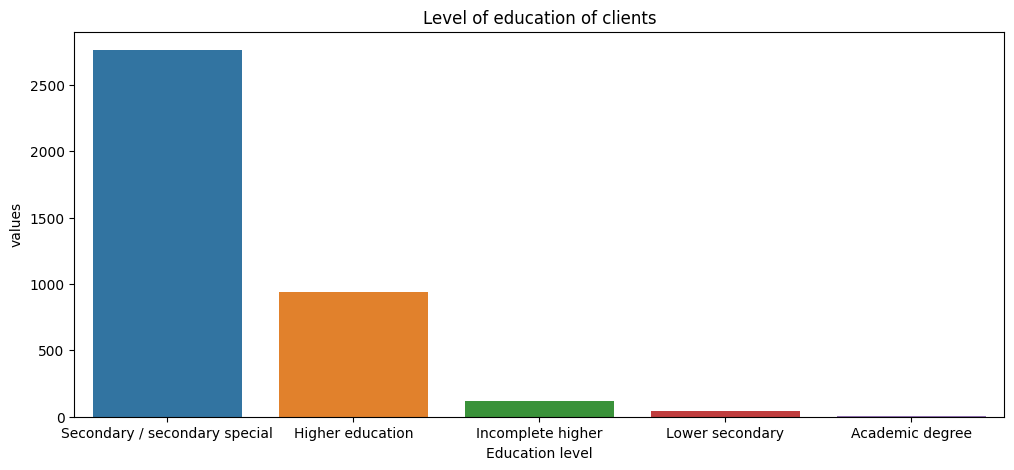

In [27]:
barplot('NAME_EDUCATION_TYPE', 'Education level', 'Level of education of clients')

In [28]:
stats('NAME_EDUCATION_TYPE')

,NAME_EDUCATION_TYPE,TARGET
3,Lower secondary,0.116
4,Secondary / secondary special,0.091
2,Incomplete higher,0.083
1,Higher education,0.038
0,Academic degree,0.000


- Most of the clients have Secondary/secondary special education, followed by clients with Higher educationOnly a very small number do have an academic degree.


- The Lower secondary category, although rare, have the largest rate of not returning the loan (10.9%). The people with Academic degree have less than 2% not - repayment rate.